#### Convolutional Neural Network Classification Using Tensorflow and Keras.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import numpy as np
import matplotlib.pyplot as plt


In [2]:
 ! git clone https://github.com/LauroCRibeiro/COVID-19-Convolutional-Neural-Network-Classification.git

Cloning into 'COVID-19-Convolutional-Neural-Network-Classification'...
remote: Enumerating objects: 2302, done.
remote: Total 2302 (delta 0), reused 0 (delta 0), pack-reused 2302
Receiving objects: 100% (2302/2302), 1.31 GiB | 30.38 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (2295/2295), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os 
base_dir = '/content/COVID-19-Convolutional-Neural-Network-Classification/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [5]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(296).jpg', 'COVID19(357).jpg', 'COVID19(460).jpg', 'COVID19(560).jpg', 'COVID19(558).jpg', 'COVID19(511).jpg', 'COVID19(529).jpg', 'COVID19(137).jpg', 'COVID-19 (17).jpg', 'COVID19(217).jpg']
['NORMAL(758).jpg', 'NORMAL(1343).jpg', 'NORMAL(1309).jpg', 'NORMAL(295).jpg', 'NORMAL(1224).jpg', 'NORMAL(62).jpg', 'NORMAL(659).jpg', 'NORMAL(1079).jpg', 'NORMAL(626).jpg', 'NORMAL(1357).jpg']
['COVID19(183).jpg', 'COVID-19 (804).jpg', 'COVID19(164).jpg', 'COVID19(355).jpg', 'COVID-19 (587).jpg', 'COVID19(186).jpg', 'COVID-19 (727).jpg', 'COVID19(253).jpg', 'COVID19(549).jpg', 'COVID-19 (709).jpg']
['NORMAL(1282).jpg', 'NORMAL(567).jpg', 'NORMAL(321).jpg', 'NORMAL(1201).jpg', 'NORMAL(10).jpg', 'NORMAL(405).jpg', 'NORMAL(833).jpg', 'NORMAL(929).jpg', 'NORMAL(127).jpg', 'NORMAL(689).jpg']


In [6]:
print("Train Dataset Covid Images: ",len(train_covid_names))
print("Train Dataset Normal Images: ", len(train_normal_names))
print("Test Dataset Covid Images: ", len(test_covid_names))
print("Test Dataset Normal Images: ", len(test_normal_names))
print("Total Train Images: ",len(train_covid_names + train_normal_names))
print("Total Test Images: ", len(test_covid_names + test_normal_names))

Train Dataset Covid Images:  545
Train Dataset Normal Images:  1266
Test Dataset Covid Images:  167
Test Dataset Normal Images:  317
Total Train Images:  1811
Total Test Images:  484


['/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(296).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(357).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(460).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(560).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(558).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(511).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(529).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/COVID19/COVID19(137).jpg']
['/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/NORMAL/NORMAL(758).jpg', '/content/COVID-19-Convolutional-Neural-Network-Classification/Data/train/NORMAL/NORMAL(134

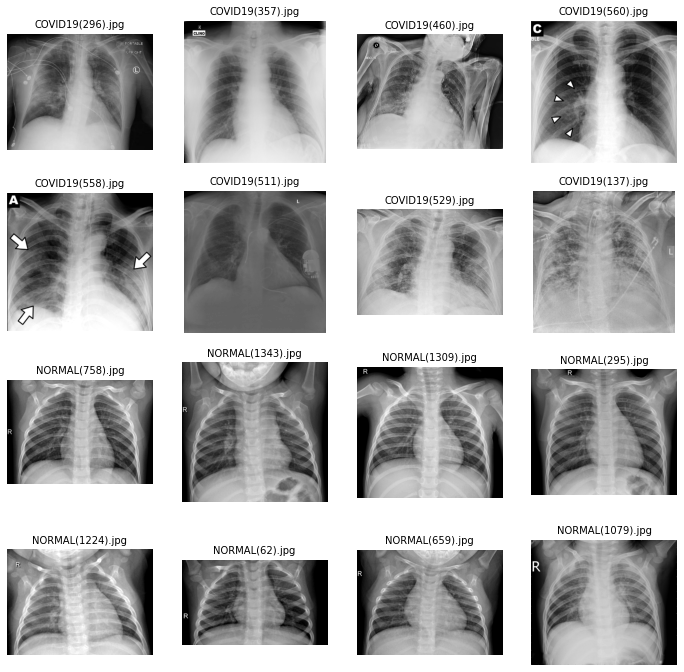

In [7]:
# Plot a grid of 16 iamges(8 Images of Covid19 and 8 images of Normal)
import matplotlib.pyplot as mpimg

 #Set the number of columns and rows
nrows=4
ncols =4

#Set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#Get the filenames from the covid and Normal dir of train dataset
next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:8]]

#Print the List 
print(next_covid_pic)
print(next_normal_pic)

for i, img_path in enumerate(next_covid_pic + next_normal_pic):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(nrows, ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img, cmap='gray')

plt.show()

In [8]:
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

#Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [10]:
train_generator.image_shape

(150, 150, 3)

#### Build CNN Model

In [11]:
model = Sequential()

# add the convolutional layer
#filters, size of filters, padding, activation_function, input_shape
model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.5))

# add another convulutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

#add a dense layer : amount of nodes, activation
model.add(Dense(250, activation='relu'))

#place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

#### Compile and Train  Model

In [12]:
# compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit_generator(train_generator,
                              epochs= 30,
                              validation_data = validation_generator,
                              validation_steps = 10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
46/46 [==============================] - 159s 3s/step - loss: 1.4708 - accuracy: 0.7315 - val_loss: 0.2597 - val_accuracy: 0.9219
Epoch 2/30
46/46 [==============================] - 157s 3s/step - loss: 0.2718 - accuracy: 0.8861 - val_loss: 0.1645 - val_accuracy: 0.9594
Epoch 3/30
46/46 [==============================] - 163s 4s/step - loss: 0.2225 - accuracy: 0.9227 - val_loss: 0.1601 - val_accuracy: 0.9563
Epoch 4/30
46/46 [==============================] - 159s 3s/step - loss: 0.1685 - accuracy: 0.9413 - val_loss: 0.2356 - val_accuracy: 0.9438
Epoch 5/30
46/46 [==============================] - 162s 4s/step - loss: 0.1573 - accuracy: 0.9448 - val_loss: 0.1214 - val_accuracy: 0.9594
Epoch 6/30
46/46 [==============================] - 161s 3s/step - loss: 0.1572 - accuracy: 0.9476 - val_loss: 0.2455 - val_accuracy: 0.9250
Epoch 7/30
46/46 [==============================] - 161s 3s/step - loss: 0.172

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

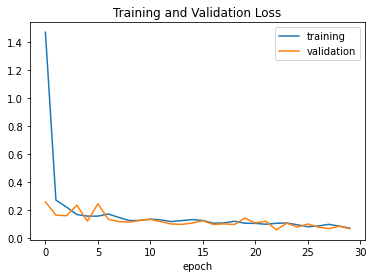

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

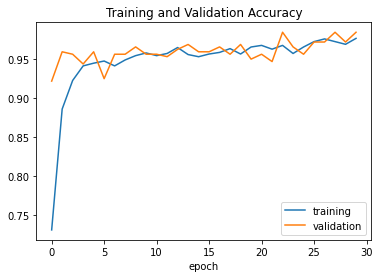

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:() test loss:()'.format(test_acc, test_loss))

16/16 [==============================] - 21s 1s/step - loss: 0.0744 - accuracy: 0.9669
test acc:() test loss:()


In [ ]:
# Test your model with some image from your local computer to predict whether a patient is affected by COVID-19 or not.

import numpy as pd
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Unfornately, It is Covid-19')
  else:
    print('This is a normal chest X-Ray')

In [ ]:
# Save in in the Folder on Google Colab
model.save('model.h5')

In [ ]:
# You can downloaded it onto your local machine
from google.colab import files
files.download('model.h5')